In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images/255.0, test_images/255.0

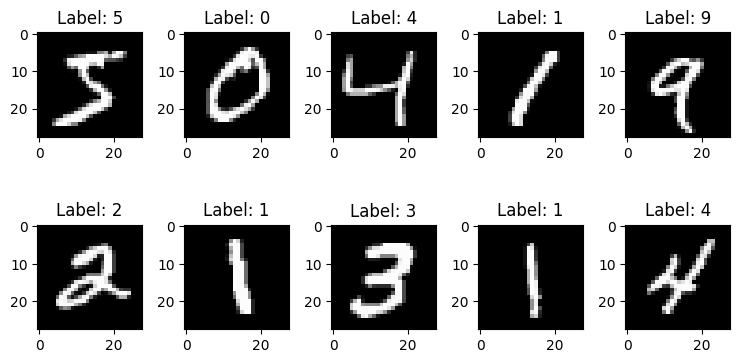

In [ ]:
num = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1480 - accuracy: 0.9545 - val_loss: 0.0510 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0323 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0361 - val_accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0355 - accuracy: 0.9905
Test accuracy: 0.9904999732971191


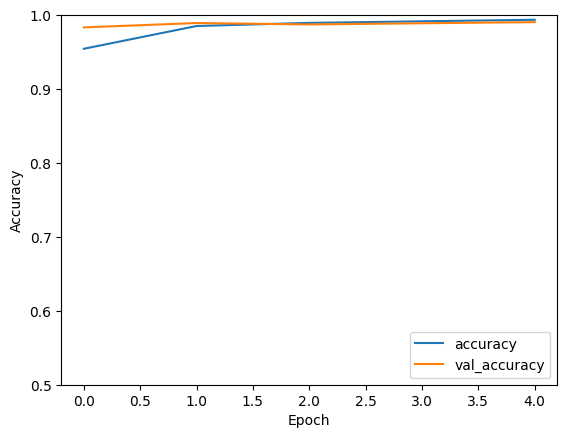

In [ ]:
# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

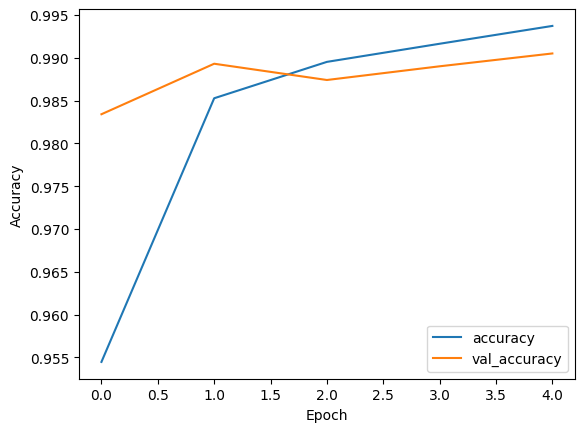

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
pred = model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


CNN pred: 5 vs actual: 5


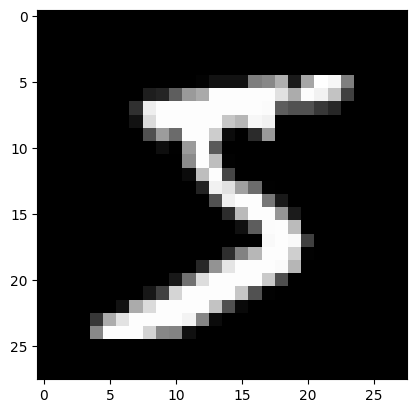

In [ ]:
pred_img = list(pred[0]).index(max(pred[0]))
print(f"CNN pred: {pred_img} vs actual: {train_labels[0]}")
fig = plt.figure
plt.imshow(train_images[0], cmap='gray')
plt.show()

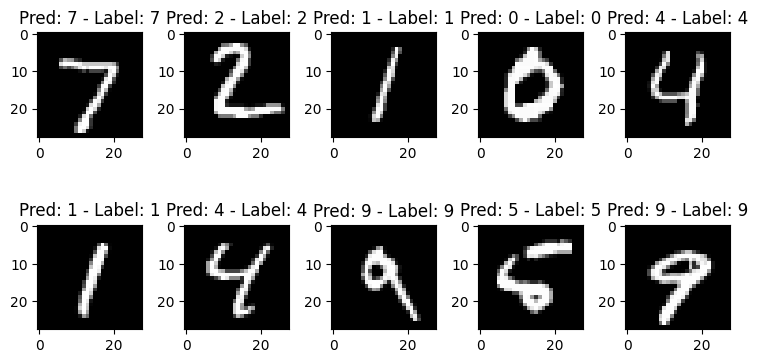

In [ ]:
num = 10
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images[i], cmap='gray')
    pred_img = list(pred[i]).index(max(pred[i]))
    ax.set_title('Pred {} - Label {}'.format(pred_img, test_labels[i]))
plt.tight_layout()
plt.show()